In [22]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [23]:
api_key = '************************channel_id = 'UCGfa6l8wXZvIges4h11hO-A'

channel_ids = ['UCGfa6l8wXZvIges4h11hO-A', #UCMO
               'UChUrzGQzRqVxhKAV9n9nIPA', #UMKC               
               'UC3c28HKYnw_dgSSICMZVu6w', #Rockhurst
               'UCIuFVDoogw9ujgLbpTCM3sQ', #UOM
               'UCoUEiPeRYq30K8K6FmCArpQ', #Webster
               'UCxB7A7r0VIi16W73gNaP78w', #St Louis Uni
              ]
youtube = build('youtube', 'v3', developerKey = api_key)

#Function to get Channel Stats

In [24]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(part='snippet, contentDetails,statistics',
                                      id=channel_id)
    response = request.execute()
    data = dict(Channel_name = response['items'][0]['snippet']['title'],
                Subscribers = response['items'][0]['statistics']['subscriberCount'],
                Views = response['items'][0]['statistics']['viewCount'],
                Total_videos = response['items'][0]['statistics']['videoCount'])
    
    return data

In [25]:
get_channel_stats(youtube, channel_id)

{'Channel_name': 'University of Central Missouri',
 'Subscribers': '3930',
 'Views': '12270866',
 'Total_videos': '380'}

In [40]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(part='snippet, contentDetails,statistics',
                                      id= ','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
        
    
    return all_data

In [41]:
channel_stats = get_channel_stats(youtube,channel_ids)

In [42]:
channel_data = pd.DataFrame(channel_stats)

In [43]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Rockhurst University,810,1092307,513,UU3c28HKYnw_dgSSICMZVu6w
1,Missouri State University,36000,5245135,921,UUIuFVDoogw9ujgLbpTCM3sQ
2,UMKC,40900,8417990,598,UUhUrzGQzRqVxhKAV9n9nIPA
3,University of Central Missouri,3930,12270866,380,UUGfa6l8wXZvIges4h11hO-A
4,SaintLouisUniversity,8880,7377265,800,UUxB7A7r0VIi16W73gNaP78w
5,Webster University,4760,777971,497,UUoUEiPeRYq30K8K6FmCArpQ


In [32]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

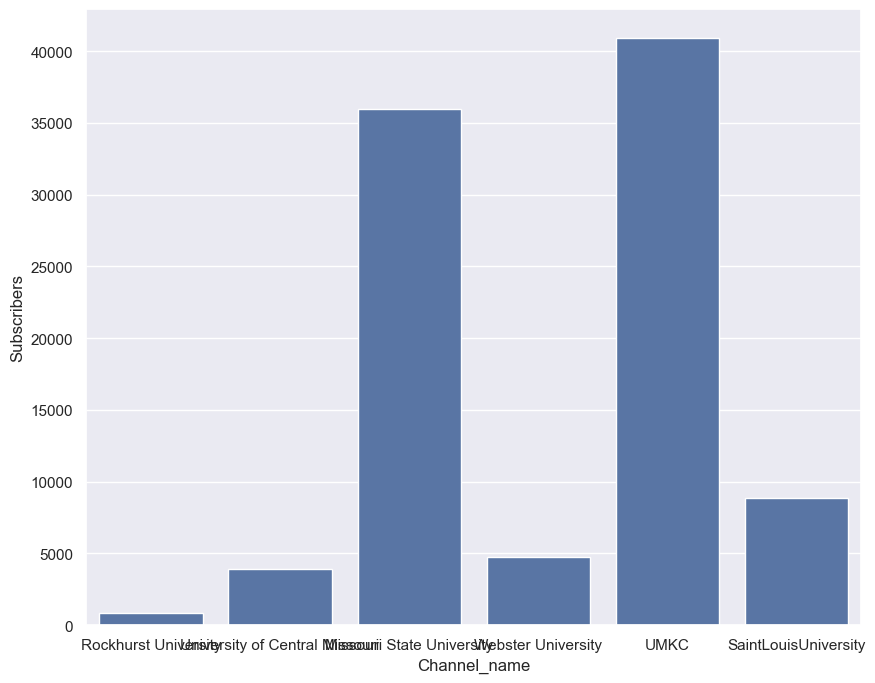

In [34]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

C:\Users\jayas\AppData\Local\Temp\ipykernel_18456\3677090140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Channel_name', y = 'Views', data=channel_data, palette='Set2')


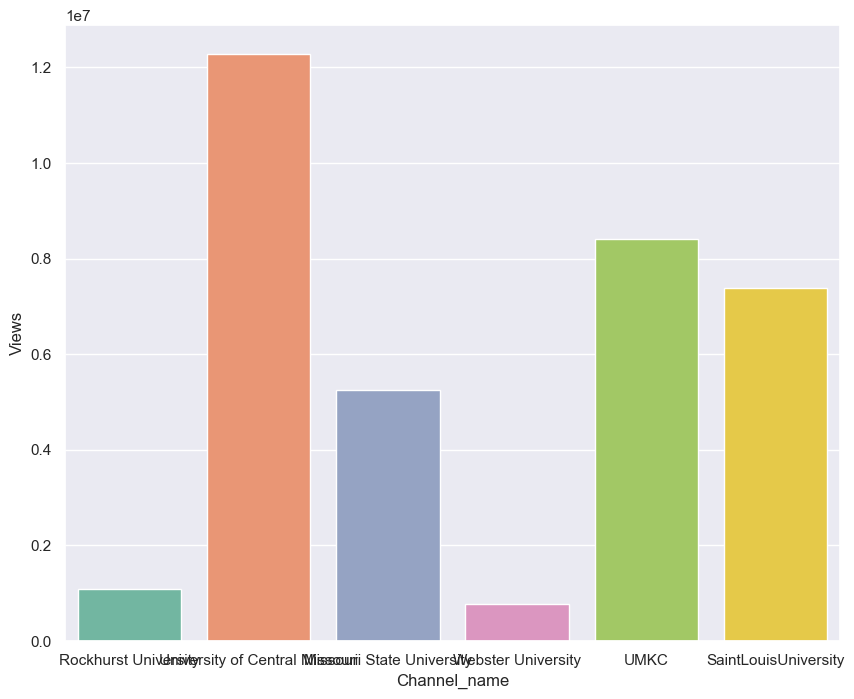

In [37]:
ax = sns.barplot(x='Channel_name', y = 'Views', data=channel_data, palette='Set2')

C:\Users\jayas\AppData\Local\Temp\ipykernel_18456\2222335129.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Channel_name', y = 'Total_videos', data=channel_data, palette= 'Set1')


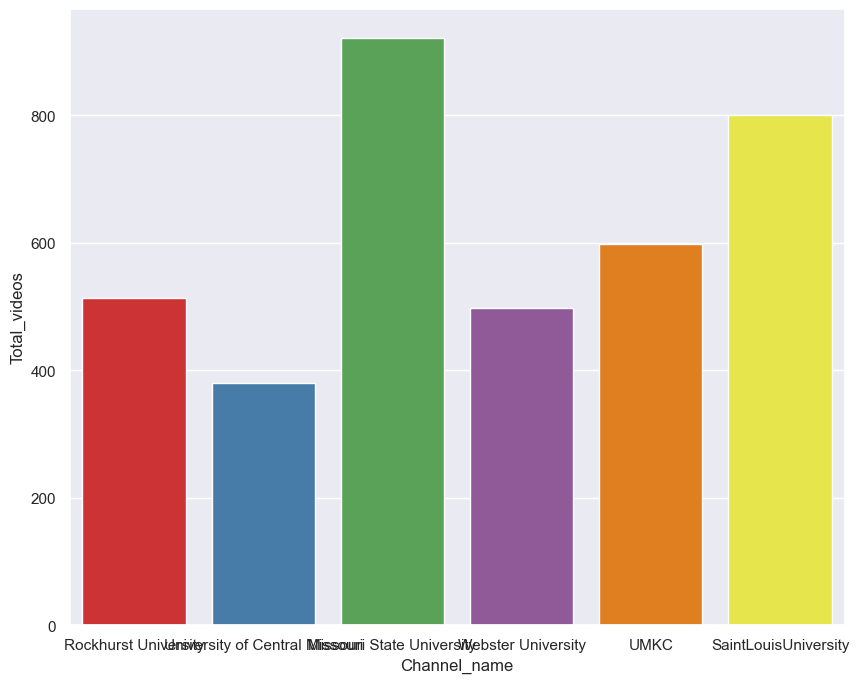

In [39]:
ax = sns.barplot(x='Channel_name', y = 'Total_videos', data=channel_data, palette= 'Set1')

In [44]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,Rockhurst University,810,1092307,513,UU3c28HKYnw_dgSSICMZVu6w
1,Missouri State University,36000,5245135,921,UUIuFVDoogw9ujgLbpTCM3sQ
2,UMKC,40900,8417990,598,UUhUrzGQzRqVxhKAV9n9nIPA
3,University of Central Missouri,3930,12270866,380,UUGfa6l8wXZvIges4h11hO-A
4,SaintLouisUniversity,8880,7377265,800,UUxB7A7r0VIi16W73gNaP78w
5,Webster University,4760,777971,497,UUoUEiPeRYq30K8K6FmCArpQ


In [69]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='University of Central Missouri','Playlist_id'].iloc[0]
playlist_id

'UUGfa6l8wXZvIges4h11hO-A'

In [70]:
##Funntion to get Video Ids

def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(part = 'contentDetails',
                                          playlistId = playlist_id, maxResults = 50)
    response = request.execute()
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(part = 'contentDetails',
                                                   playlistId = playlist_id, maxResults = 50,
                                                   pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
            
    response = request.execute()
    return video_ids

In [71]:
video_ids = get_video_ids(youtube,playlist_id)
video_ids

['Ap35mniTTRc',
 'a_ZRNFMRCdI',
 'XsBQtGMk-ME',
 'CgiJhBbKlj8',
 'K3P4s9XDdfA',
 'FMHt-7y9BUI',
 'HZq1Ec1M-Y4',
 'P0_gMrkRNNs',
 'a9gqPYIbhL8',
 'lnr6nzCff4g',
 'IeHztS4K6Go',
 'AYbhfhsQAAc',
 'KZ_I2yEyrK0',
 'a3_6lKU3brs',
 'Gd_YhyaI5CY',
 'Y7E4ajpQvLY',
 'wy-n5uoC-FM',
 'Lmy1FPOAnmw',
 '6Pcy_6J8nLw',
 'tQ_Nd_a2RXU',
 'tBqDj9Cs9ag',
 'bj3wumDMQqY',
 'IXzQvuD6sAE',
 'QLkF9JjdDq0',
 'Q7APsFS6v_E',
 'fEJrooD3P-o',
 '_YrEMSMvX_Y',
 '6m4VEpHgyKo',
 'Oot_ZUXpISY',
 'F7fwfE9PVz4',
 'VPIJwEjw0GU',
 'zUMU4KDHSHQ',
 'uw8eyKCVp4Y',
 'rEtbDLtgwCI',
 '2wJ_CQtEK10',
 'nf4u-ab3Lrw',
 '3z3wS4OPspc',
 'qF7nR_vILxA',
 'nqQqjaFO6Dc',
 'LkckjZH2LbE',
 'HCa4fZBbFnE',
 '4C3QUdyg6RI',
 'torSdIb-JaA',
 'pRYHyXEw3I0',
 'WRWhw0rXk5A',
 'Csorr6dGImQ',
 'c-v49HzQ0Hs',
 'Alfx461e0dg',
 'zR7HYUw0_Q0',
 'IBuM91IhBy8',
 'dZt2DTTKbSk',
 'cc-9X2MsppU',
 'CJQo7w6hlhk',
 'MmRkuRlbAPw',
 'NqSJbAJYUF8',
 'cvT3i-bhvRQ',
 'EBlcNaO8Q4Y',
 'dMw0F5KoLJo',
 'G5WmE8g1MZ8',
 '6WO7swJ7Rhs',
 'EGN82ZyuFno',
 'lqiF2xy3DDI',
 '5WgylO

#Function to get video details


In [81]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(part = 'snippet,statistics',
                                        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
                               
    return all_video_stats

In [82]:
video_details = get_video_details(youtube, video_ids)

In [78]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes,Comments
0,UCM Online - University of Central Missouri,2024-11-20T14:25:22Z,55,1,1
1,Level Up with a Master's Degree - University o...,2024-11-20T14:21:36Z,23,3,0
2,"Fall 2024 Commencement - 5:30 p.m. Saturday, D...",2024-11-01T16:02:23Z,0,1,0
3,"Fall 2024 Commencement - 2 p.m. Saturday, Dece...",2024-11-01T15:57:38Z,0,0,0
4,"Fall 2024 Commencement - 10 a.m. Saturday, Dec...",2024-11-01T15:53:32Z,0,0,0
...,...,...,...,...,...
379,UCM Distinguished Alumni 2013 - Col. (Ret.) Pa...,2013-10-29T17:13:51Z,223,1,0
380,UCM Distinguished Alumni 2013 - Frank Fendorf,2013-10-29T16:55:31Z,235,1,0
381,Fox 4 Coverage of UCM Fall 2013,2013-08-21T21:44:56Z,747,7,0
382,President Obama at UCM,2013-07-27T03:17:36Z,6862,46,1


In [83]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

In [84]:
top10_videos = video_data.sort_values(by = 'Views', ascending = False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
285,Opportunity in Action - University of Central ...,2018-09-19,2983309,21,3
144,Red Means Go: Making Things Happen - Universit...,2021-09-08,2698667,9,0
256,Discover Opportunity In Action - University of...,2019-09-17,2442937,23,0
77,Welcome to our Stomping Ground - University of...,2023-08-23,1593042,15,0
205,We Are MuleStrong - University of Central Miss...,2020-12-01,906043,10,0
113,Red Means Go: Difference Makers - University o...,2022-03-29,662535,6,0
97,Big Experiences - University of Central Missouri,2022-09-08,258639,5,0
258,This Is Our Stomping Ground - University of Ce...,2019-08-29,250959,16,1
111,University of Central Missouri - Discover Oppo...,2022-04-25,166353,8,1
223,Virtual Campus Tour - University of Central Mi...,2020-05-20,35507,365,11


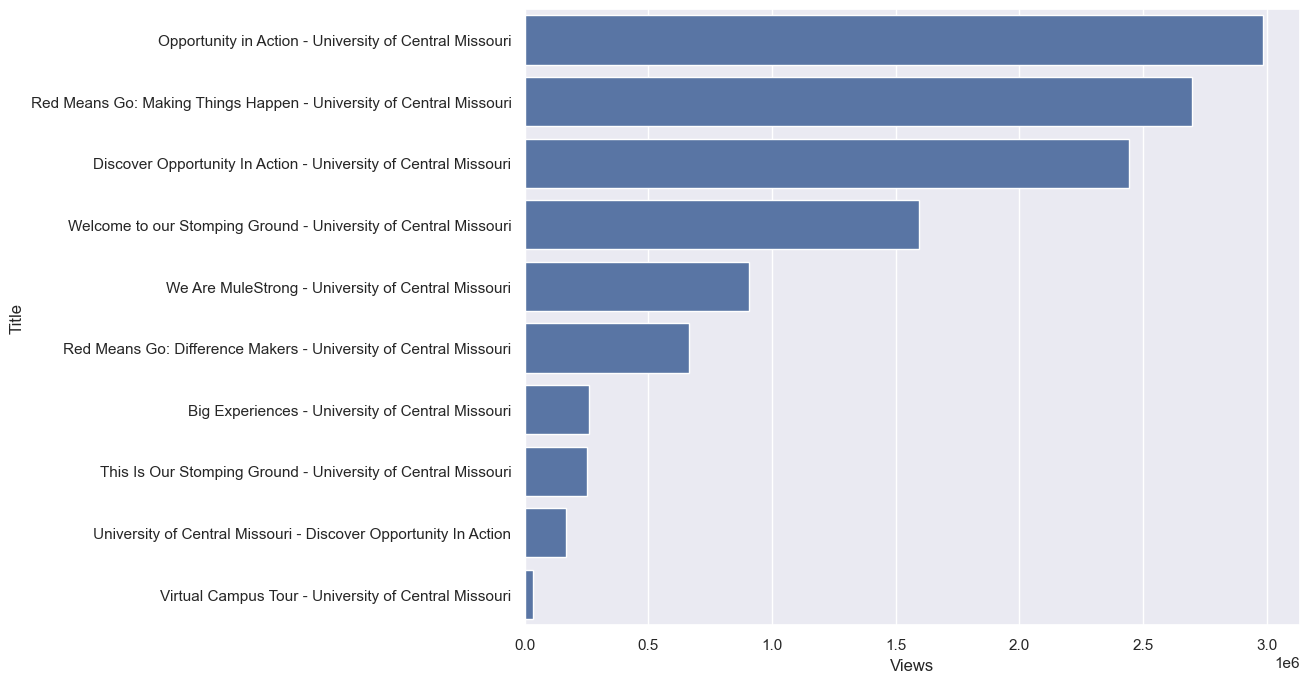

In [85]:
ax1 = sns.barplot(x = 'Views' , y ='Title', data = top10_videos)

In [86]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,UCM Online - University of Central Missouri,2024-11-20,55,1,1,Nov
1,Level Up with a Master's Degree - University o...,2024-11-20,23,3,0,Nov
2,"Fall 2024 Commencement - 5:30 p.m. Saturday, D...",2024-11-01,0,1,0,Nov
3,"Fall 2024 Commencement - 2 p.m. Saturday, Dece...",2024-11-01,0,0,0,Nov
4,"Fall 2024 Commencement - 10 a.m. Saturday, Dec...",2024-11-01,0,0,0,Nov
...,...,...,...,...,...,...
379,UCM Distinguished Alumni 2013 - Col. (Ret.) Pa...,2013-10-29,223,1,0,Oct
380,UCM Distinguished Alumni 2013 - Frank Fendorf,2013-10-29,235,1,0,Oct
381,Fox 4 Coverage of UCM Fall 2013,2013-08-21,747,7,0,Aug
382,President Obama at UCM,2013-07-27,6862,46,1,Jul


In [88]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,57
1,Aug,37
2,Dec,37
3,Feb,27
4,Jan,16
5,Jul,8
6,Jun,27
7,Mar,19
8,May,42
9,Nov,18


In [90]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
              'Aug','Sep', 'Oct', 'Nov', 'Dec']

In [92]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered = True)
videos_per_month = videos_per_month.sort_index()

C:\Users\jayas\AppData\Local\Temp\ipykernel_18456\1079657178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x = 'Month', y = 'size', data = videos_per_month, palette = 'Set2')


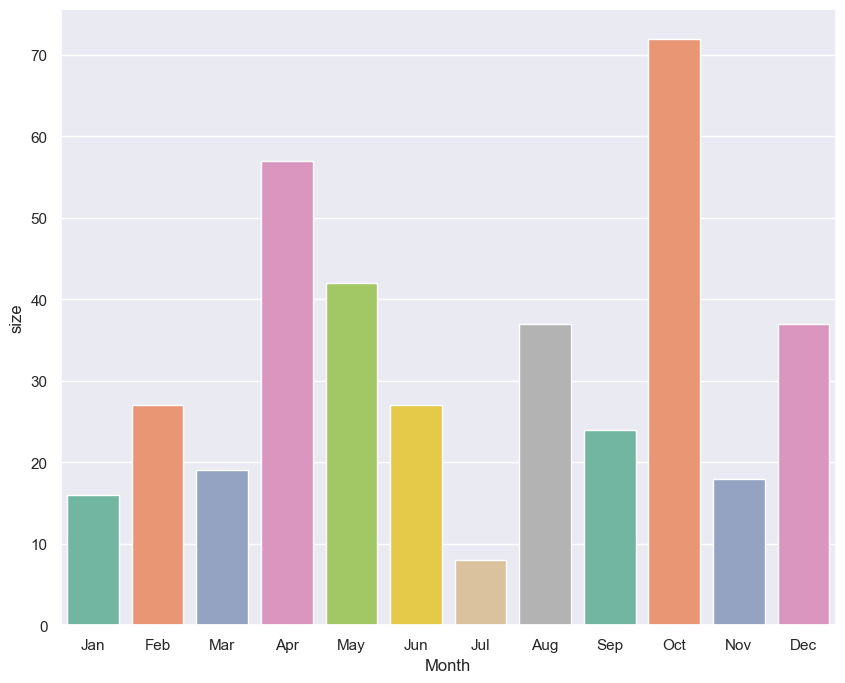

In [95]:
ax2 = sns.barplot(x = 'Month', y = 'size', data = videos_per_month, palette = 'Set2')

In [96]:
video_data.to_csv('Video_Details(UCMO).csv')